# Part II - Ford GoBike System Dataset Analysis
## by Abderrahmen Mansour

## Investigation Overview


In this analysis, I focused on several variables that can affect the frequency of trips: Day of week and hour of day, and how the duration of each trip can vary by user types, day of week, and hour of day. In addition, I analyzed User types by distance /duration of trip, and age of user.

## Dataset Overview

The dataset contains ride data information for about 183,000 rides in the Ford GoBike system covering the greater San Francisco Bay area, with variables including user behavior (duration, date-time, station location) and demographic information (user type, gender, age).

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [17]:
Bike_clean = pd.read_csv("Cleaned_Data.csv")

## Trip distribution by day of the week and hour
**On what day of the week is there the most traffic?**
> * During the weekdays, the number of trips does not differ significantly, about 27.500 trips per day.
> * At weekends, the number of trips decreases by about 50%, i.e. 14.000 trips per day.

**During which time of day is there the most traffic?**
> * The highest traffic volume occurs between 7 and 9 a.m. and between 4 and 6 p.m.
> * Between 10 a.m. and 3 p.m., the hourly traffic volume is about 7,500.
> * Before 7 a.m. and after 6 p.m., the number of trips decreases sharply.
> * During the midnight hours (1-5 a.m.), only a few people ride GoBike.


In [18]:
#First transform ordinal objects into the appropriate form
var_dict = {'user_type': ['Subscriber','Customer'],
            'start_day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
            'end_day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']} 
#              'bike_share_for_all_trip': ['No', 'Yes'],
#              'start_time(hr)': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
#                             '18', '19', '20', '21', '22', '23'],
#              'end_time(hr)': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
#                             '18', '19', '20', '21', '22', '23']}
for v in var_dict:
    ordered_v = pd.api.types.CategoricalDtype(ordered = True, categories= var_dict[v])
    Bike_clean[v] = Bike_clean[v].astype(ordered_v)

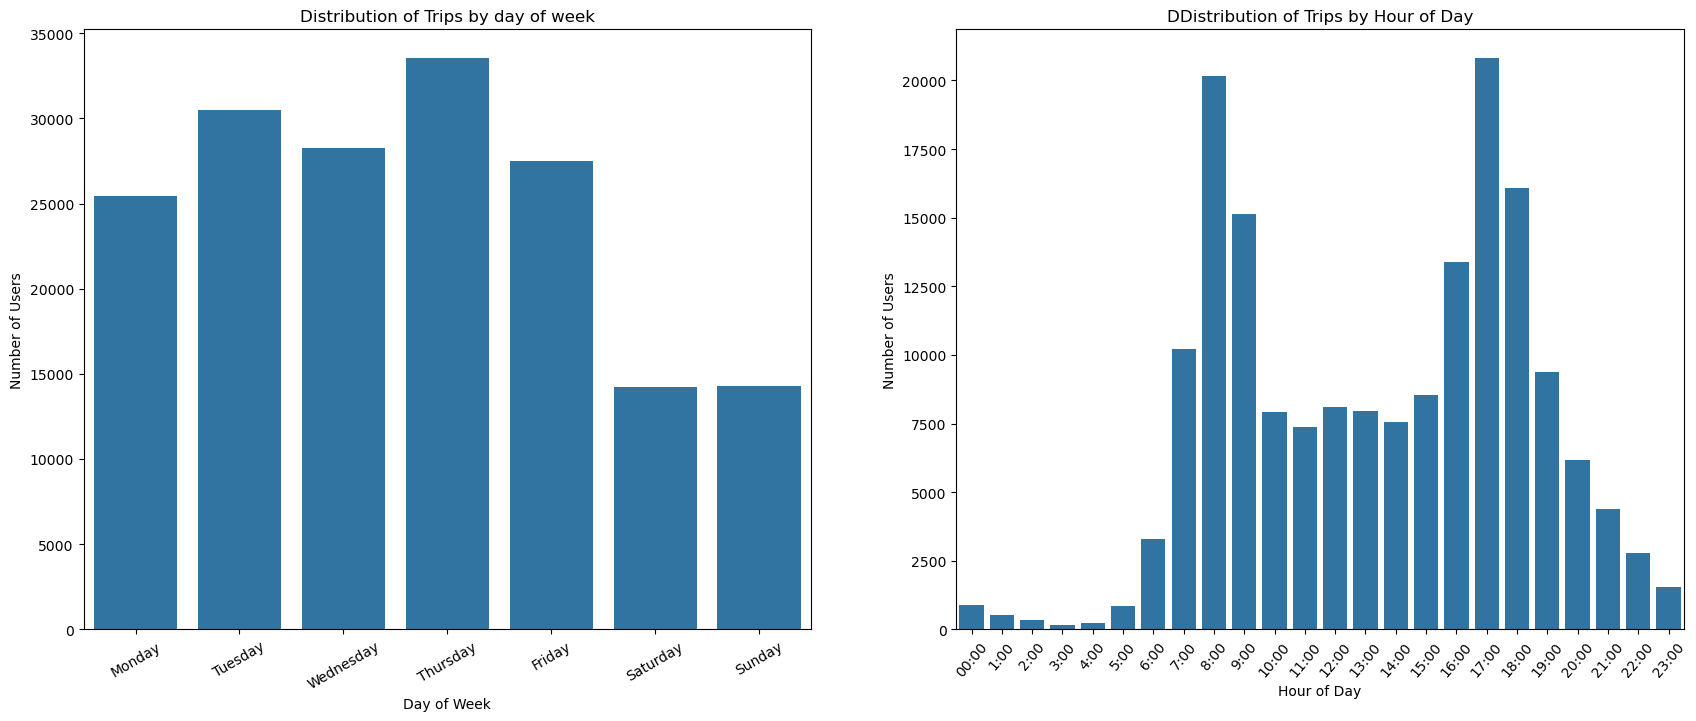

In [34]:
#to plot the three figures side by side
plt.figure(figsize = [20, 18])
color = sb.color_palette()[0]
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.4)

#Distribution of start/end trips by day of the week
plt.subplot(2, 2, 1)
sb.countplot(data = Bike_clean, x ="start_day", color = color);
plt.xticks(rotation = 30)
plt.xlabel('Day of Week');
plt.ylabel('Number of Users');
plt.title('Distribution of Trips by day of week');

plt.subplot(2, 2, 2)
sb.countplot(data = Bike_clean, x = "start_time(hr)", color = color)
#setting customized ticklabels for x axis
labs = ['00:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00',
       '12:00', '13:00', '14:00', '15:00', '16:00', '17:00','18:00', '19:00', '20:00', '21:00', '22:00', '23:00'] 
plt.xticks(range(24), labs, rotation = 50)
plt.xlabel('Hour of Day');
plt.ylabel('Number of Users');
plt.title('DDistribution of Trips by Hour of Day');


# sb.countplot(data =Bike_clean, x= "end_day", color = color);
# plt.xticks(rotation = 30)
# plt.title('Distribution of end trips by day of the week');

# #Distribution of start/end trips by Hour of the Day
# plt.subplot(2, 2, 3)
# sb.countplot(data = Bike_clean, x = "start_time(hr)", color = color)
# #setting customized ticklabels for x axis
# labs = ['00:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00',
#        '12:00', '13:00', '14:00', '15:00', '16:00', '17:00','18:00', '19:00', '20:00', '21:00', '22:00', '23:00'] 
# plt.xticks(range(24), labs, rotation = 50)
# plt.title('DDistribution of Bike Start Time (hr)');

# plt.subplot(2, 2, 4)
# sb.countplot(data = Bike_clean , x ="end_time(hr)", color = color)
# #setting customized ticklabels for x axis
# labs = ['00:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00',
#        '12:00', '13:00', '14:00', '15:00', '16:00', '17:00','18:00', '19:00', '20:00', '21:00', '22:00', '23:00'] 
# plt.xticks(range(24), labs, rotation = 50)
# plt.title('Distribution of Bike End Time (hr)');

In [25]:
Bike_clean['start_time(hr)'] = Bike_clean['start_time(hr)'].astype(int)

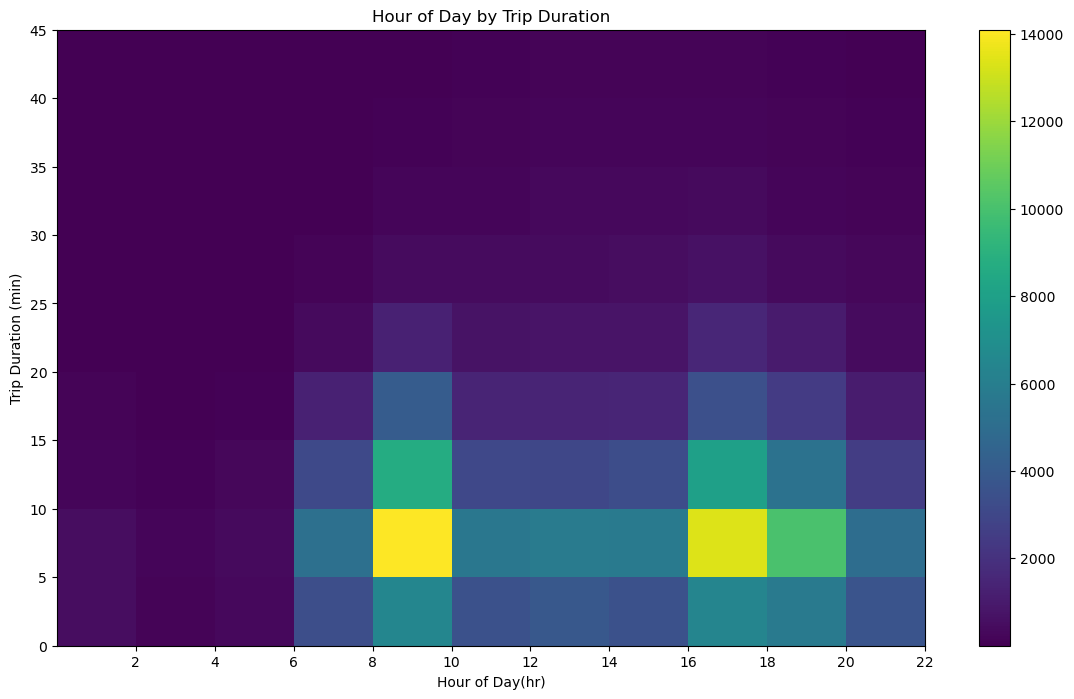

In [35]:
plt.figure(figsize = [14, 8])
bins_x = np.arange(0,24,2)
bins_y = np.arange(0,50,5)
plt.hist2d(data=Bike_clean, x = 'start_time(hr)', y = 'duration_min',cmin=0.5, bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Hour of Day(hr)')
plt.ylabel('Trip Duration (min)');
plt.title("Hour of Day by Trip Duration");
plt.xticks(np.arange(2, 24, 2));

## Durations by day of the week per user type
**What is the usage behavior of the different user types?**
> * Subscriber usage time during the week does not change much on average.
> * On weekends, the duration of customers are higher than on weekdays.
> * On average, the duration of customers is higher than that of daily subscribers.

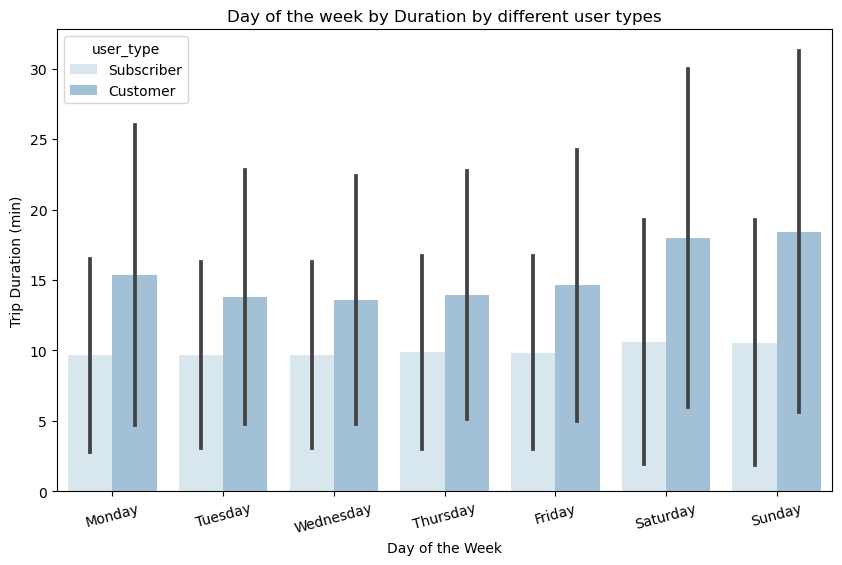

In [40]:
plt.figure(figsize = [10,6])
sb.barplot(data=Bike_clean, x='start_day', y='duration_min',hue = 'user_type', palette = 'Blues', ci='sd',alpha = 0.5)
plt.xticks(rotation=15);
plt.xlabel('Day of the Week');
plt.ylabel('Trip Duration (min)');
plt.title("Day of the week by Duration by different user types");

## Number of customers vs. Number of subscribers
There are 9 times more subscribers than customers in the dataset.

In [63]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

In [42]:
#function to plot a piechart
def pie_Chart(values, labels, title, explode):
    
    explode = explode
    plt.pie(values ,explode=explode,counterclock=False, shadow=False, autopct='%1.1f%%')
    plt.title(title)
    plt.legend(labels, loc='center left', bbox_to_anchor=(1.5, 0.5))
    plt.show()

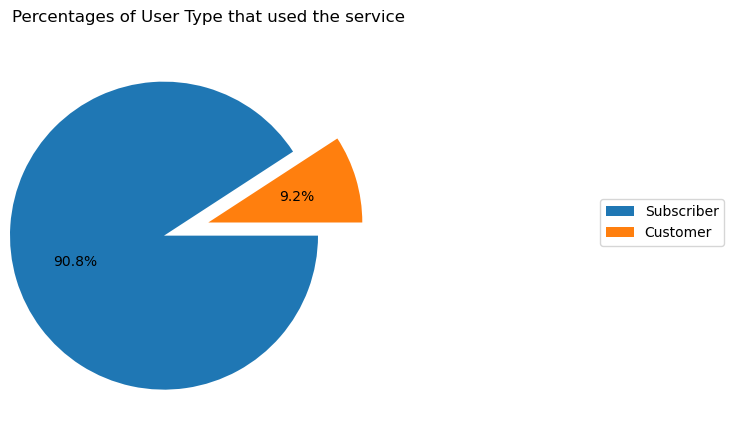

In [65]:
#plot piechart of Most counted Distances in km using function
plt.figure(figsize = [10, 5])
sorted_user_type = Bike_clean.user_type.value_counts().sort_values(ascending=False)
title = 'Percentages of User Type that used the service'
explode = (0.3, 0)
pie_Chart(sorted_user_type.values, sorted_user_type.index, title, explode)

## Distance Cycled vs. type of Customer
Subscribers tend to make short trips, while customers tend to make long trips.

Note: Outliers have been removed from this chart.

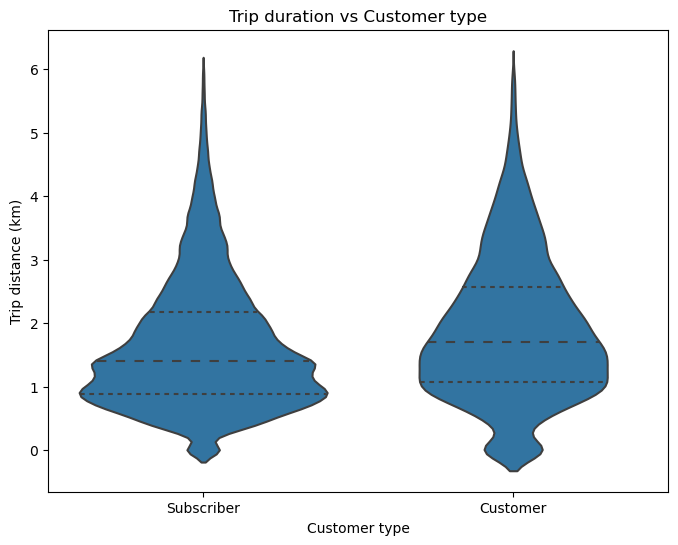

In [67]:
plt.figure(figsize = [8,6])
#show user type vs Distance in violin plot
sb.violinplot(data = Bike_clean.query("trip_km <= 6"),x = 'user_type',y='trip_km',color = sb.color_palette()[0],inner='quartile');
plt.title("Trip duration vs Customer type");
plt.xlabel("Customer type");
plt.ylabel("Trip distance (km)");

## Age vs. customer type
There is no significant correlation between age and customer type.

Note: Age axis ends at 80 years.

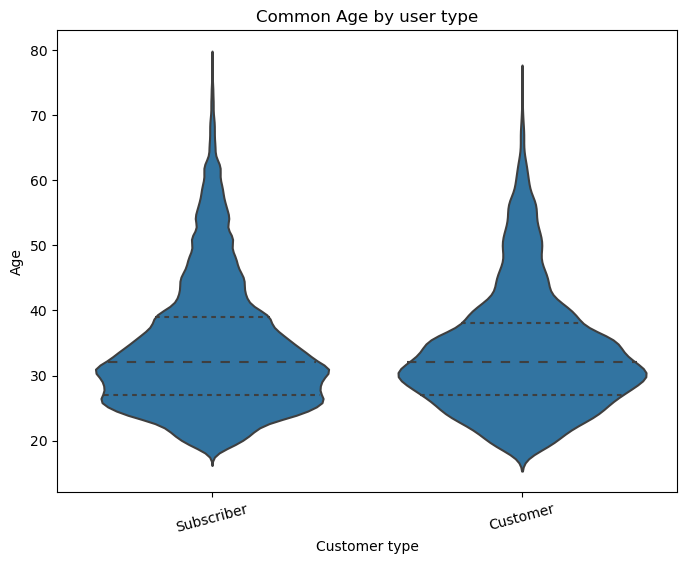

In [70]:
# show user type vs Age in boxplot
plt.figure(figsize = [8,6])
# plt.subplot(1,2, 1)
# sb.boxplot(data=Bike_clean, x='user_type', y='age', color=sb.color_palette()[0])
# plt.xlabel("Customer type");
# plt.ylabel("Age");
# plt.title("Common Age by user type");
# plt.xticks(rotation=15);


#show user type vs Age in violin plot
# plt.subplot(1,2, 2)
sb.violinplot(data = Bike_clean.query("age <= 79"),
               x = 'user_type',y='age',
               color = sb.color_palette()[0],inner='quartile');

plt.xlabel("Customer type");
plt.ylabel("Age");
plt.title("Common Age by user type");
plt.xticks(rotation=15);

## Trip duration vs. Customer type
Subscribers tend to travel for shorter durations, while customers tend to travel for longer durations.

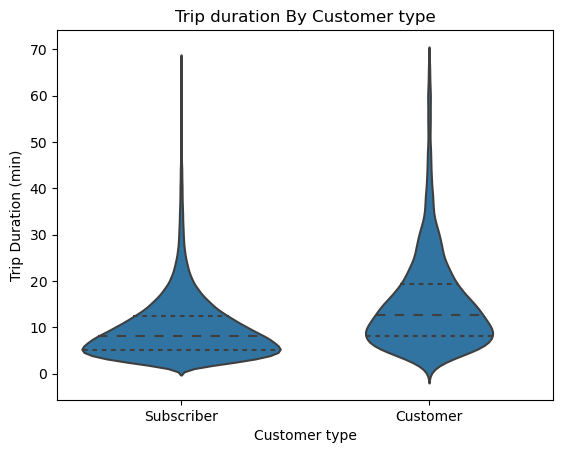

In [53]:

#show user type vs duration in violin plot
sb.violinplot(data = Bike_clean,
               x = 'user_type',y='duration_min',
               color = sb.color_palette()[0],inner='quartile');
plt.title("Trip duration By Customer type");
plt.xlabel("Customer type");
plt.ylabel("Trip Duration (min)");

## 





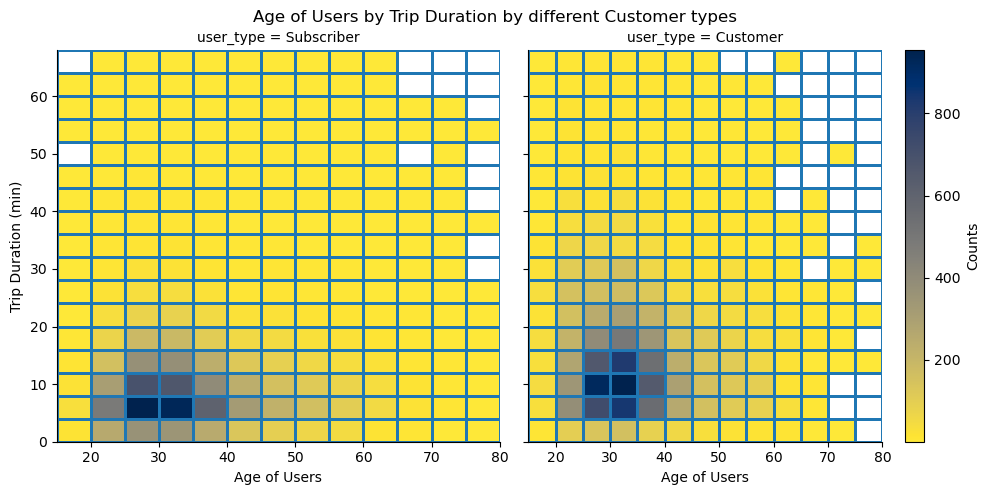

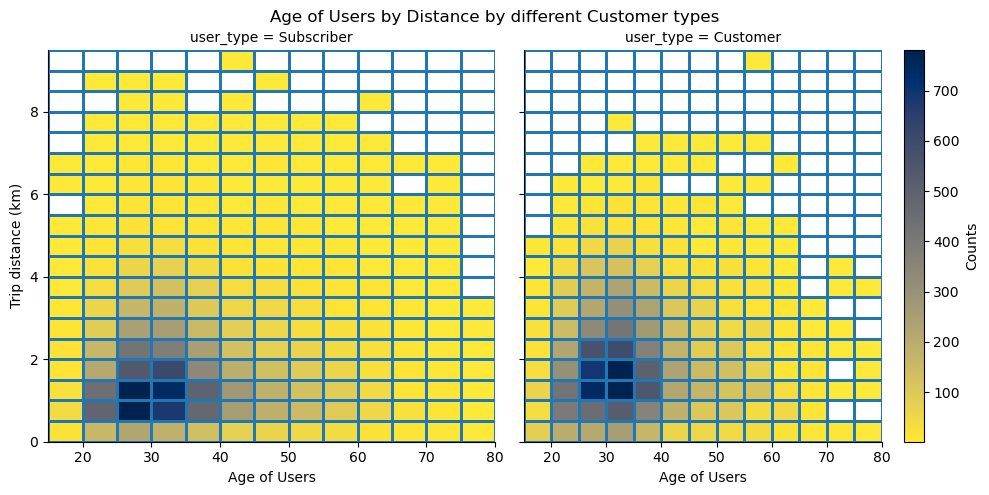

In [76]:
#plot 2D histogram showing counts of duration in min vs Year of birth vs Customer type
xbin = np.arange(15, 79+5, 5)
ybin = np.arange(0, 72, 4)
#set grid size
grid = sb.FacetGrid(data = Bike_clean, col = 'user_type',height=5)
grid.map(plt.hist2d, 'age','duration_min',cmin=0.5,cmap = 'cividis_r',bins=[xbin, ybin]);
plt.colorbar().set_label('Counts');

plt.subplots_adjust(top=0.9)
grid.set_ylabels("Trip Duration (min)");
grid.set_xlabels("Age of Users");
grid.fig.suptitle("Age of Users by Trip Duration by different Customer types");


#plot 2D histogram showing counts of distances vs Year of birth vs Customer type
xbin = np.arange(15, 79+5, 5)
ybin = np.arange(0, 10, 0.5)
#set grid size
grid = sb.FacetGrid(data = Bike_clean, col = 'user_type',height=5)
grid.map(plt.hist2d, 'age','trip_km',cmin=0.5,cmap = 'cividis_r',bins=[xbin, ybin]);
plt.colorbar().set_label('Counts');

plt.subplots_adjust(top=0.9)
grid.set_ylabels("Trip distance (km)");
grid.set_xlabels("Age of Users");
grid.fig.suptitle("Age of Users by Distance by different Customer types");

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
